In [60]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
mat = loadmat('data/pca.mat')
data = pd.DataFrame(mat['X'], columns=['x', 'y'])
del mat
data = data.sample(frac=1)

data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()

data.describe()

,x,y
count,5.000000e+01,5.000000e+01
mean,-1.154632e-16,2.486900e-16
std,1.000000e+00,1.000000e+00
min,-2.394640e+00,-2.075528e+00
25%,-7.997354e-01,-5.712237e-01
50%,-2.196037e-02,9.849625e-03
75%,7.689532e-01,7.892240e-01
max,1.638492e+00,2.306403e+00


In [7]:
data.head()

,x,y
14,-0.983270,-1.206546
25,-0.652518,-0.058872
3,-1.043460,-1.257946
15,1.403184,1.279362
22,1.406686,1.092067


<AxesSubplot:xlabel='x', ylabel='y'>

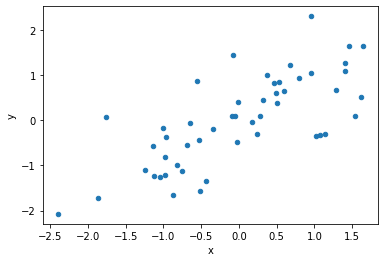

In [8]:
data.plot.scatter(x='x', y='y')

In [55]:
X = data.to_numpy()
m = X.shape[0]
n = X.shape[1]
Sigma = np.matmul(X.T, X) / m
Sigma

array([[0.98      , 0.72081977],
       [0.72081977, 0.98      ]])

In [50]:
U, S, V = np.linalg.svd(Sigma)

In [51]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [52]:
S

array([1.70081977, 0.25918023])

In [53]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [54]:
decision = []
S_sum = np.sum(S)
for s in S:
    if len(decision) == 0:
        decision.append(s / S_sum)
    else:
        decision.append(decision[-1] + (s / S_sum))
decision

[0.8677651881696647, 1.0]

In [56]:
u = U[:, 0].reshape(n, 1)
u

array([[-0.70710678],
       [-0.70710678]])

In [59]:
x = np.matmul(X, u)
x

array([[ 1.548434  ],
       [ 0.5030287 ],
       [ 1.62734009],
       [-1.89684585],
       [-1.76688508],
       [ 1.28362916],
       [-1.33938187],
       [-0.97972107],
       [-2.19518524],
       [ 1.3252858 ],
       [ 1.21208656],
       [-2.30653955],
       [-1.42814204],
       [-0.00686207],
       [-0.58656923],
       [ 0.94646472],
       [-1.16020771],
       [ 0.8792732 ],
       [ 1.48127391],
       [ 1.25605967],
       [ 1.64838858],
       [-0.26923019],
       [-1.2246766 ],
       [ 1.26042409],
       [-0.27570789],
       [ 0.38509662],
       [ 0.83375215],
       [-0.77386123],
       [-0.62532902],
       [ 0.36423084],
       [ 2.53419743],
       [-0.96700223],
       [-0.02968998],
       [-0.4731351 ],
       [-0.54724542],
       [ 0.0512347 ],
       [ 1.67053477],
       [-0.08878025],
       [-1.49788781],
       [ 0.67225099],
       [ 1.20080033],
       [ 1.79450473],
       [-2.31794969],
       [-0.87788459],
       [-0.91291229],
       [-1

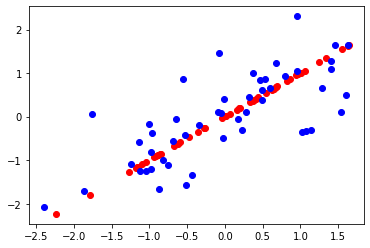

In [63]:
X_rec = np.matmul(x, u.T)
plt.scatter(X_rec[:, 0], X_rec[:, 1], c='red')
plt.scatter(X[:, 0], X[:, 1], c='blue')